# Project PICOM

## Import the libraries and files

In [ ]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#Import the files
camera_df = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Cameras.shp")
rivieres = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Rivieres.shp")
roads = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Reseau_Routier.shp")
railroad = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Reseau_Ferroviaire.shp")
slope = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Pente.shp")
landcover = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Type_Couverture.shp")
sol = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\utilisation_territoire2.shp")


In [ ]:
sol

In [ ]:
#export the camera dataframe
camera_df.to_file(r"C:\Users\thier\Downloads\Projet\Projet\points.shp", )
camera_df

In [ ]:
roads.plot()    

In [ ]:
camera_df

In [ ]:
camera_df = camera_df.set_index("Site")

In [ ]:
camera_df.plot()

In [ ]:
#Make sure the projection is the right one
camera_df = camera_df.to_crs('EPSG:26918')

### Create buffers of 500m, 1km and 2km

In [ ]:
#Create buffers for each cameras
buffered_geometries_500m = camera_df.geometry.apply(lambda geom: geom.buffer(500))
buffered_geometries_1km = camera_df.geometry.apply(lambda geom: geom.buffer(1000))
buffered_geometries_2km = camera_df.geometry.apply(lambda geom: geom.buffer(2000))

# Create GeoDataFrames for each buffer
buffered_camera_df_500m = gpd.GeoDataFrame(geometry=buffered_geometries_500m, crs=camera_df.crs)
buffered_camera_df_1km = gpd.GeoDataFrame(geometry=buffered_geometries_1km, crs=camera_df.crs)
buffered_camera_df_2km = gpd.GeoDataFrame(geometry=buffered_geometries_2km, crs=camera_df.crs)


In [ ]:
#Export the buffers shp
buffered_camera_df_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_500m.shp")
buffered_camera_df_1km.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_1km.shp")
buffered_camera_df_2km.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_2km.shp")

In [ ]:
buffered_camera_df_500m = buffered_camera_df_500m.reset_index().rename(columns={'index': 'camera'}) 
buffered_camera_df_1km = buffered_camera_df_1km.reset_index().rename(columns={'index': 'camera'})
buffered_camera_df_2km = buffered_camera_df_2km.reset_index().rename(columns={'index': 'camera'})


In [ ]:
buffered_camera_df_1km

In [ ]:
# Create a new column 'id' with index values for 500m, 1km and 2km buffers
buffered_camera_df_500m['id'] = buffered_camera_df_500m.index
buffered_camera_df_500m
buffered_camera_df_1km['id'] = buffered_camera_df_1km.index
buffered_camera_df_1km
buffered_camera_df_2km['id'] = buffered_camera_df_2km.index
buffered_camera_df_2km

## Rivers

### Set the rivers shp projection

In [ ]:
print("CRS of rivieres:", rivieres.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_500m.crs)

In [ ]:
if rivieres.crs is None:
    rivieres.crs = 'EPSG:26918'
rivieres = rivieres.to_crs(buffered_camera_df_500m.crs)

### Rivers buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace rivieres_1km with rivieres_500m, and buffered_camera_df_1km with buffered_camera_df_500m
rivieres_500m = rivieres.overlay(buffered_camera_df_500m, how='intersection')
rivieres_500m['length'] = rivieres_500m.geometry.length

# Ensure that 'Site' and other necessary columns are included
rivieres_500m_clean = rivieres_500m[['Site', 'length', 'geometry']]
rivieres_500m_sum = rivieres_500m_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
rivieres_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_500m.shp")
rivieres_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_500m.csv")

# Print the result and plot it
print(rivieres_500m_sum)
rivieres_500m_sum.plot()


### Rivers buffers 1km   

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace rivieres_2km with rivieres_1km, and buffered_camera_df_2km with buffered_camera_df_1km
rivieres_1km = rivieres.overlay(buffered_camera_df_1km, how='intersection')
rivieres_1km['length'] = rivieres_1km.geometry.length

# Ensure that 'Site' and other necessary columns are included
rivieres_1km_clean = rivieres_1km[['Site', 'length', 'geometry']]
rivieres_1km_sum = rivieres_1km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
rivieres_1km_sum.to_file(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_1km.shp")
rivieres_1km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_1km.csv")

# Print the result and plot it
print(rivieres_1km_sum)
rivieres_1km_sum.plot()


### Rivers buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace roads_2km with rivieres_2km, and ensure buffered_camera_df_2km is correct
rivieres_2km = rivieres.overlay(buffered_camera_df_2km, how='intersection')
rivieres_2km['length'] = rivieres_2km.geometry.length

# Ensure that 'Site' and other necessary columns are included
rivieres_2km_clean = rivieres_2km[['Site', 'length', 'geometry']]
rivieres_2km_sum = rivieres_2km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
rivieres_2km_sum.to_file(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_2km.shp")
rivieres_2km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_2km.csv")

# Print the result and plot it
print(rivieres_2km_sum)
rivieres_2km_sum.plot()


### ALL 3 buffers at the same time with a for loop

In [ ]:
import openpyxl

In [ ]:
import geopandas as gpd
import pandas as pd

def process_buffers(buffer_df, buffer_name, rivers_gdf, output_csv_path):
    results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])
    clipped_results_gdf = gpd.GeoDataFrame()

    for selected_buffer_index in range(len(buffer_df)):
        selected_buffer = buffer_df.iloc[selected_buffer_index:selected_buffer_index + 1]
        clipped_shp = gpd.overlay(rivers_gdf, selected_buffer, how='intersection')
        clipped_length = clipped_shp.length.sum()
        print(f"{buffer_name} - Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")

        results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
        clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivers_gdf.crs)

    results_df.to_csv(output_csv_path, index=False)

process_buffers(buffered_camera_df_500m, "Rivers buffers 500m", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_500m_test2.csv")
process_buffers(buffered_camera_df_1km, "Rivers buffers 1km", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_1km_test2.csv")
process_buffers(buffered_camera_df_2km, "Rivers buffers 2km", rivieres, r"C:\Users\thier\Downloads\Projet\\Projet\rivers_buffers_2km_test2.csv")

## Roads

In [ ]:
print("CRS of roads:", roads.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if roads.crs is None:
    roads.crs = 'EPSG:26918'
roads = roads.to_crs(buffered_camera_df_1km.crs)

### Roads buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_500m with roads_500m, and ensure buffered_camera_df_500m is correct
roads_500m = roads.overlay(buffered_camera_df_500m, how='intersection')
roads_500m['length'] = roads_500m.geometry.length

# Ensure that 'Site' and other necessary columns are included
roads_500m_clean = roads_500m[['Site', 'length', 'geometry']]
roads_500m_sum = roads_500m_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
roads_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.shp")
roads_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.csv")

# Print the result and plot it
print(roads_500m_sum)
roads_500m_sum.plot()


### Roads buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace roads_500m with roads_1km, and buffered_camera_df_500m with buffered_camera_df_1km
roads_1km = roads.overlay(buffered_camera_df_1km, how='intersection')
roads_1km['length'] = roads_1km.geometry.length

# Ensure that 'Site' and other necessary columns are included
roads_1km_clean = roads_1km[['Site', 'length', 'geometry']]
roads_1km_sum = roads_1km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
roads_1km_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_1km.shp")
roads_1km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_1km.csv")

# Print the result and plot it
print(roads_1km_sum)
roads_1km_sum.plot()


### Roads buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace roads_1km with roads_2km, and buffered_camera_df_1km with buffered_camera_df_2km
roads_2km = roads.overlay(buffered_camera_df_2km, how='intersection')
roads_2km['length'] = roads_2km.geometry.length

# Ensure that 'Site' and other necessary columns are included
roads_2km_clean = roads_2km[['Site', 'length', 'geometry']]
roads_2km_sum = roads_2km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
roads_2km_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_2km.shp")
roads_2km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_2km.csv")

# Print the result and plot it
print(roads_2km_sum)
roads_2km_sum.plot()


## Railroads

In [ ]:
print("CRS of roads:", railroad.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if railroad.crs is None:
    railroad.crs = 'EPSG:26918'
railroad = railroad.to_crs(buffered_camera_df_1km.crs)

### Railroad buffer 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_1km with railroad_500m, and buffered_camera_df_1km with buffered_camera_df_500m
railroad_500m = railroad.overlay(buffered_camera_df_500m, how='intersection')
railroad_500m['length'] = railroad_500m.geometry.length

# Ensure that 'Site' and other necessary columns are included
railroad_500m_clean = railroad_500m[['Site', 'length', 'geometry']]
railroad_500m_sum = railroad_500m_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
railroad_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\railroad_buffers_500m.shp")
railroad_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\railroad_buffers_500m.csv")

# Print the result and plot it
print(railroad_500m_sum)
railroad_500m_sum.plot()



### Railroad buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_2km with railroad_1km, and buffered_camera_df_2km with buffered_camera_df_1km
railroad_1km = railroad.overlay(buffered_camera_df_1km, how='intersection')
railroad_1km['length'] = railroad_1km.geometry.length

# Ensure that 'Site' and other necessary columns are included
railroad_1km_clean = railroad_1km[['Site', 'length', 'geometry']]
railroad_1km_sum = railroad_1km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
railroad_1km_sum.to_file(r"C:\Users\thier\Downloads\Projet\railroad_buffers_1km.shp")
railroad_1km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\railroad_buffers_1km.csv")

# Print the result and plot it
print(railroad_1km_sum)
railroad_1km_sum.plot()


### Railroad buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_1km with railroad_2km, and buffered_camera_df_1km with buffered_camera_df_2km
railroad_2km = railroad.overlay(buffered_camera_df_2km, how='intersection')
railroad_2km['length'] = railroad_2km.geometry.length

# Ensure that 'Site' and other necessary columns are included
railroad_2km_clean = railroad_2km[['Site', 'length', 'geometry']]
railroad_2km_sum = railroad_2km_clean.dissolve(by='Site', aggfunc='sum')


# Update the file paths in the to_file and to_csv methods
railroad_2km_sum.to_file(r"C:\Users\thier\Downloads\Projet\railroad_buffers_2km_2.shp")
railroad_2km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\railroad_buffers_2km.csv")

# Print the result and plot it
print(railroad_2km_sum)
railroad_2km_sum.plot()


In [ ]:
railroad_2km_clean = railroad_2km[['Site', 'length', 'geometry']]

In [ ]:
railroad_2km_clean

In [ ]:
railroad_2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Join the railroad data with the individual buffers
railroad_buffers_join_2km = gpd.sjoin(railroad, buffered_camera_df_2km, how='inner', predicate='intersects')

# Calculate the length of each railroad segment
railroad_buffers_join_2km['length'] = railroad_buffers_join_2km.geometry.length

# Create an empty GeoDataFrame for the results
results = gpd.GeoDataFrame(columns=railroad_buffers_join_2km.columns)

# Iterate over each buffer and process individually
for buffer_id, buffer_geom in buffered_camera_df_2km.iterrows():
    # Clip the railroad data to the current buffer
    clipped_railroad = railroad_buffers_join_2km[railroad_buffers_join_2km.intersects(buffer_geom.geometry)]

    # Ensure clipped_railroad is a GeoDataFrame
    if not isinstance(clipped_railroad, gpd.GeoDataFrame):
        clipped_railroad = gpd.GeoDataFrame(clipped_railroad)

    # Add the clipped data to the results GeoDataFrame
    results = pd.concat([results, clipped_railroad])

# Drop duplicates to handle overlaps
# Replace 'railroad_id' and 'buffer_id' with actual column names
#results = results.drop_duplicates(subset=['railroad_id', 'buffer_id'])

# Group by 'Site' and sum lengths
railroad_2km_grouped = results.dissolve('Site', aggfunc='sum')

# Export in shp or CSV
output_folder = r"C:\Users\thier\Downloads\Projet"
railroad_2km_grouped.to_file(f"{output_folder}\\railroad_buffers_2km.shp")
railroad_2km_grouped.to_csv(f"{output_folder}\\railroad_buffers_2km.csv")

# Print the result
print(railroad_2km_grouped)


In [ ]:
print(type(results))

## Slope

In [ ]:
print("CRS of roads:", slope.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if slope.crs is None:
    slope.crs = 'EPSG:26918'
slope = slope.to_crs(buffered_camera_df_1km.crs)

In [ ]:
slope

### Slope buffer 500m

In [ ]:
import geopandas as gpd
import pandas as pd

slope_500m = slope.overlay(buffered_camera_df_500m, how='intersection')
slope_500m["area"]=slope_500m["geometry"].area
# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in slope_500m['Site'].unique():
    # Filter the data for the current site
    slope_site = slope_500m[slope_500m["Site"] == site]

    # Dissolve by 'CL_PENT' and sum 'superficie'
    dissolved = slope_site.dissolve(by=['CL_PENT', 'Site'], aggfunc={'area':'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
slope_500m_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
slope_500m_gdf.to_file(r"C:\Users\thier\Downloads\Projet\slope_500m.shp")
slope_500m_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\slope_500m.csv")

# Print and plot the result
slope_500m_gdf, slope_500m_gdf.plot()


### Slope buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_1km is your new GeoDataFrame with 1 km buffers
slope_1km = slope.overlay(buffered_camera_df_1km, how='intersection')
slope_1km["area"] = slope_1km["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in slope_1km['Site'].unique():
    # Filter the data for the current site
    slope_site = slope_1km[slope_1km["Site"] == site]

    # Dissolve by 'CL_PENT' and sum 'area'
    dissolved = slope_site.dissolve(by=['CL_PENT', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
slope_1km_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
slope_1km_gdf.to_file(r"C:\Users\thier\Downloads\Projet\slope_1km.shp")
slope_1km_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\slope_1km.csv")

# Print and plot the result
slope_1km_gdf, slope_1km_gdf.plot()


### Slope buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_2km is your new GeoDataFrame with 2 km buffers
slope_2km = slope.overlay(buffered_camera_df_2km, how='intersection')
slope_2km["area"] = slope_2km["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in slope_2km['Site'].unique():
    # Filter the data for the current site
    slope_site = slope_2km[slope_2km["Site"] == site]

    # Dissolve by 'CL_PENT' and sum 'area'
    dissolved = slope_site.dissolve(by=['CL_PENT', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
slope_2km_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
slope_2km_gdf.to_file(r"C:\Users\thier\Downloads\Projet\slope_2km.shp")
slope_2km_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\slope_2km.csv")

# Print and plot the result
slope_2km_gdf, slope_2km_gdf.plot()


## Landcover type

In [ ]:
print("CRS of roads:", landcover.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

### Landcover buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_500m is your GeoDataFrame with 500m buffers
landcover_500m = landcover.overlay(buffered_camera_df_500m, how='intersection')
landcover_500m["area"] = landcover_500m["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in landcover_500m['Site'].unique():
    # Filter the data for the current site
    landcover_site = landcover_500m[landcover_500m["Site"] == site]

    # Dissolve by 'CL_PENT' and sum 'area'
    dissolved = landcover_site.dissolve(by=['TYPE_TER', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
landcover_500m_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
landcover_500m_gdf.to_file(r"C:\Users\thier\Downloads\Projet\landcover_500m.shp")
landcover_500m_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\landcover_500m.csv")

# Print and plot the result
landcover_500m_gdf, landcover_500m_gdf.plot()


### Landcover buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_1km is your GeoDataFrame with 1km buffers
landcover_1km = landcover.overlay(buffered_camera_df_1km, how='intersection')
landcover_1km["area"] = landcover_1km["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in landcover_1km['Site'].unique():
    # Filter the data for the current site
    landcover_site = landcover_1km[landcover_1km["Site"] == site]

    # Dissolve by 'TYPE_TER' and sum 'area'
    dissolved = landcover_site.dissolve(by=['TYPE_TER', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
landcover_1km_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
landcover_1km_gdf.to_file(r"C:\Users\thier\Downloads\Projet\landcover_1km.shp")
landcover_1km_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\landcover_1km.csv")

# Print and plot the result
landcover_1km_gdf, landcover_1km_gdf.plot()


In [ ]:
import folium
landcover_1km_gdf.explore(column='TYPE_TER', cmap='tab20', legend_name='Land Cover')

### Landcover buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_2km is your GeoDataFrame with 2km buffers
landcover_2km = landcover.overlay(buffered_camera_df_2km, how='intersection')
landcover_2km["area"] = landcover_2km["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in landcover_2km['Site'].unique():
    # Filter the data for the current site
    landcover_site = landcover_2km[landcover_2km["Site"] == site]

    # Dissolve by 'TYPE_TER' and sum 'area'
    dissolved = landcover_site.dissolve(by=['TYPE_TER', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
landcover_2km_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
landcover_2km_gdf.to_file(r"C:\Users\thier\Downloads\Projet\landcover_2km.shp")
landcover_2km_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\landcover_2km.csv")

# Print and plot the result
landcover_2km_gdf, landcover_2km_gdf.plot()


In [ ]:
import folium
landcover_2km_gdf.explore(column='TYPE_TER', cmap='tab20', legend_name='Land Cover')

## Utilisation du sol

### Check projection first


In [ ]:
print("CRS of roads:", sol.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_500m.crs)

### Sol buffers 500m

In [ ]:
buffered_camera_df_500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_500m is your GeoDataFrame with 500m buffers
sol_500m = sol.overlay(buffered_camera_df_500m, how='intersection')
sol_500m["area"] = sol_500m["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in sol_500m['Site'].unique():
    # Filter the data for the current site
    sol_site = sol_500m[sol_500m["Site"] == site]

    # Dissolve by 'TYPE_TER' and sum 'area'
    dissolved = sol_site.dissolve(by=['DESC_CAT', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
sol_500m_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
sol_500m_gdf.to_file(r"C:\Users\thier\Downloads\Projet\sol_500m.shp")
sol_500m_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\sol_500m.csv")

# Print and plot the result
sol_500m_gdf, sol_500m_gdf.plot()


### Sol buffer 1km

(              DESC_CAT Site  \
 0             Agricole    4   
 1          Anthropique    4   
 2            Aquatique    4   
 3   Coupe et régénérat    4   
 4            Forestier    4   
 ..                 ...  ...   
 83         Anthropique  18A   
 84           Aquatique  18A   
 85  Coupe et régénérat  18A   
 86           Forestier  18A   
 87              Humide  18A   
 
                                              geometry          area  
 0   MULTIPOLYGON (((664080.030 5148942.680, 664091...  1.525436e+06  
 1   MULTIPOLYGON (((663624.220 5149048.964, 663608...  2.330050e+05  
 2   MULTIPOLYGON (((665412.398 5148517.544, 665412...  8.944213e+04  
 3   MULTIPOLYGON (((665359.061 5149119.912, 665389...  1.758876e+04  
 4   MULTIPOLYGON (((664296.894 5148369.274, 664314...  1.217354e+06  
 ..                                                ...           ...  
 83  MULTIPOLYGON (((675405.159 5129126.631, 675405...  5.837809e+05  
 84  MULTIPOLYGON (((675615.532 5128996.729, 6

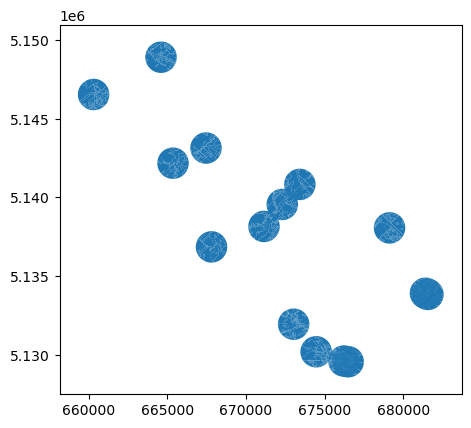

In [800]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_1km is your GeoDataFrame with 1km buffers
sol_1km = sol.overlay(buffered_camera_df_1km, how='intersection')
sol_1km["area"] = sol_1km["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in sol_1km['Site'].unique():
    # Filter the data for the current site
    sol_site = sol_1km[sol_1km["Site"] == site]

    # Dissolve by 'DESC_CAT' and sum 'area'
    dissolved = sol_site.dissolve(by=['DESC_CAT', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
sol_1km_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
sol_1km_gdf.to_file(r"C:\Users\thier\Downloads\Projet\sol_1km.shp")
sol_1km_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\sol_1km.csv")

# Print and plot the result
sol_1km_gdf, sol_1km_gdf.plot()


### Sol buffer 2km

(              DESC_CAT Site  \
 0             Agricole    4   
 1          Anthropique    4   
 2            Aquatique    4   
 3   Coupe et régénérat    4   
 4            Forestier    4   
 ..                 ...  ...   
 91           Aquatique  18A   
 92  Coupe et régénérat  18A   
 93           Forestier  18A   
 94              Humide  18A   
 95       Non classifié  18A   
 
                                              geometry          area  
 0   MULTIPOLYGON (((662939.843 5148147.976, 662982...  5.440858e+06  
 1   MULTIPOLYGON (((662761.086 5148212.682, 662794...  8.392507e+05  
 2   MULTIPOLYGON (((665893.767 5148170.328, 665856...  1.537998e+05  
 3   MULTIPOLYGON (((664833.279 5147034.499, 664858...  2.744716e+05  
 4   MULTIPOLYGON (((664149.156 5146962.336, 664157...  5.503931e+06  
 ..                                                ...           ...  
 91  MULTIPOLYGON (((674890.911 5129551.767, 674879...  3.301983e+06  
 92  MULTIPOLYGON (((674388.351 5129138.441, 6

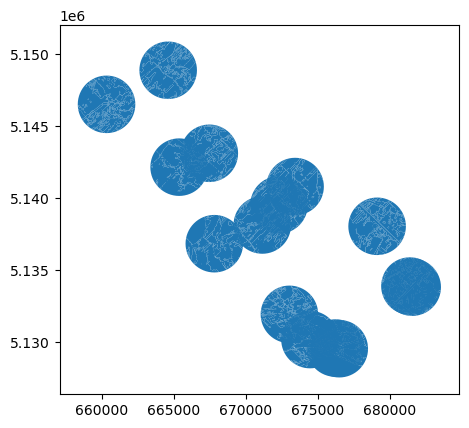

In [801]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_2km is your GeoDataFrame with 2km buffers
sol_2km = sol.overlay(buffered_camera_df_2km, how='intersection')
sol_2km["area"] = sol_2km["geometry"].area

# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in sol_2km['Site'].unique():
    # Filter the data for the current site
    sol_site = sol_2km[sol_2km["Site"] == site]

    # Dissolve by 'DESC_CAT' and sum 'area'
    dissolved = sol_site.dissolve(by=['DESC_CAT', 'Site'], aggfunc={'area': 'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
sol_2km_gdf = pd.concat(all_sites).reset_index()
# Save the GeoDataFrame
sol_2km_gdf.to_file(r"C:\Users\thier\Downloads\Projet\sol_2km.shp")
sol_2km_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\sol_2km.csv")

# Print and plot the result
sol_2km_gdf, sol_2km_gdf.plot()
